# Lotka Volterra

The Lotka–Volterra equations, also known as the *predator–prey* equations, are a pair of *first-order* **nonlinear** differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey.
The equations provides a mathematical framework for the description of **ecosystem** dynamics in which 2 species interact each other.

The equations represent a syntesis among the population dynnamic (provided by Volterra) and the theory of autocatalytic chemical reactions with oscillating creation of chemical products (provided by Lotka).
The equations describe an ideal system in which the increasing amount of "food" (prey eaten) leads to a growth of predators (reproduction).

Given $y(t)$ as the number of *predators* at time $t$ and $x(t)$ the number of *preys*, the Lotka-Volterra system of equations is:

$$
\begin{align*}
    \frac{dx}{dt} &= +\alpha x  - \beta xy \\
    \frac{dy}{dt} &= +\delta xy - \gamma y \\
\end{align*}
$$

where the sign $+$ identifies the "birth" terms (preys grows up autonomally, while predators need preys) and the negative terms ($-$) identifies the "death" terms (vice versa between predators and preys)

The $\alpha x$ term is analogous to the logistic growth: more preys and more preys birth.
The terms $\alpha$, $\beta$, $\gamma$, and $\delta$ are the **interaction terms** between the two species and they weight the growth of predator-prey populations.

The Lotka–Volterra system of equations is an example of a Kolmogorov model, which is a more general framework that can model the dynamics of ecological systems with predator–prey interactions, competition, disease, and mutualism. 

Lets try to deduce some characteristics of the model looking the form of the equations:

* The growth of predators ($y$) is strictly related to the number of preys ($x$).
    * if $y > x$ only a portion of the predators will have enough "food" for their reproduction with a consequent decrement of their number.
    * if $y < x$ the preys can increase their number since they are prevalently "safe"; however all the predators have (more than) enough "food" for their reproduction and they will tend to increase.
    This behavior leads to an **oscillating regime** of the system!
    
* The main assumption behind this model (i.e ideal factor) is the **unlimited growth** of prey population when the number of predators is 0 ($y = 0$).
    An improvement of the model can be achieved including (as for the improved Malthusian model) an extra term $-\xi x^2$ which reduce the ideality of the model.

* An analogous argumentation can be applied for the exponential decay of the predators when the preys are zero ($x = 0$).

* Further correction factors can be included considering genetic terms which model the adaptation of the species in the environment.

Starting from the implementation of the model in Python, we will try to perform a numerical analysis of the dynamic of this simple system.

As always we will use the *odeint* function of *scipy* for the numerical integration of the 2 ODEs.

In [1]:
import numpy as np

def lotka_volterra (xy : tuple, t : np.ndarray, 
                    alpha : float, beta : float, 
                    delta : float, gamma : float) -> tuple:
    '''
    Lotka-Volterra ODE
    
    Parameters
    ----------
        xy : tuple
            List of x and y Lotka-Volterra signals
            
        t : array-like
            List of time points
        
        alpha : float
            Preys growth factor
        
        beta : float
            Preys decay factor
        
        delta : float
            Predators growth factor
        
        gamma : float
            Predators growth factor
    
    Returns
    -------
        xynew : tuple
            Next point of x and y dynamic
    '''
    
    x, y = xy
    dx = alpha * x - beta * x * y
    dy = delta * x * y - gamma * y
    return (dx, dy)

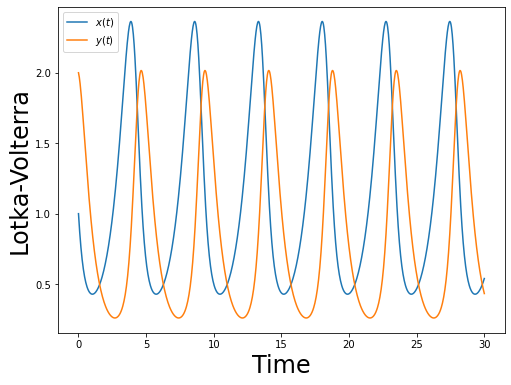

In [2]:
import pylab as plt
from scipy.integrate import odeint

# initial conditions
xy0 = (1, 2) # (x0, y0)
alpha, beta, delta, gamma = (1.2, 1.4, 1.5, 1.7)

time = np.linspace(0, 30, 1000)
xy = odeint(lotka_volterra, xy0, time, 
            args=(alpha, beta, delta, gamma))
dx, dy = zip(*xy)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(time, dx, label='$x(t)$')
ax.plot(time, dy, label='$y(t)$')
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Lotka-Volterra', fontsize=24)
ax.legend()

## Stability Analysis

Given the Lotka-Volterra system of equations, we can determine its stable points (points of *equilibrium*).
We have a stable point when the level of both the populations remains **constant**, i.e $x(t) = x^*$ and $y(t) = y^*$ for each time $t$.
As consequence, both the derivatives will be null, i.e

$$
\begin{align*}
    \alpha x^* - \beta x^* y^* &= 0 \\
    \delta x^*y^* - \gamma y^* &= 0 \\
\end{align*}
$$

This system of equation is very simple to solve, *but* unfortunately we are very lazy persons and we prefer to obtain its solution by the computer...

To this purpose we can use the *Symbolic Computation* provided by the **SymPy** library in Python.

In [3]:
from sympy import symbols
from sympy import solve

x, y = symbols('x, y')
alpha, beta, delta, gamma = symbols('alpha, beta, delta, gamma')

dx = alpha * x - beta * x * y
dy = delta * x * y - gamma * y
stable_points = solve([dx, dy], (x, y))

print('\n'.join([r'(𝑥∗, 𝑦∗) = ({}, {})'.format(*x) 
                 for x in stable_points]))

(𝑥∗, 𝑦∗) = (0, 0)
(𝑥∗, 𝑦∗) = (gamma/delta, alpha/beta)


We have found 2 points of equilibrium: the 1st ($0, 0$) is related to the extinction of both the populations; the 2nd $\left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right)$ corresponds to a perfect equilibrium between preys "eaten" and preys "produced".

A second analysis can be performed studying the stability of equilibrium points.
This can be obtained studying the determinant of the Jacobian matrix associated to the system, i.e

$$
J(x, y) = \begin{bmatrix} \alpha - \beta y & -\beta x \\ \delta y & \delta x - \gamma \end{bmatrix}
$$

The matrix is obtained considering the dependecy by $x$ (first column) and $y$ (second column) of the two ODEs, independently.
Now we can substitute the equilibrium points obtained above into the matrix and compute the corresponding eigenvalues.

* 1st point: $(0, 0)$

$$
J(0, 0) = \begin{bmatrix} \alpha & 0 \\ 0 & -\gamma \end{bmatrix}
$$

* 2nd point: $\left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right)$

$$
J\left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right) = \begin{bmatrix} 0 & -\beta\frac{\gamma}{\delta} \\ \alpha\frac{\delta}{\beta} & 0 \end{bmatrix}
$$

For the computation of the eigenvalue solutions we can use the Symbolic Computation as performed above.

In [4]:
from sympy import symbols
from sympy import Matrix

x, y = symbols('x, y')
alpha, beta, delta, gamma = symbols('alpha, beta, delta, gamma')

J = Matrix([[alpha - beta * y, -beta * x], 
            [delta * y, delta * x - gamma]])

# substitute the 1st stable point
J_1st = J.subs([*zip([x, y], stable_points[0])])

# compute the eigenvalues
print('\n'.join(['Eigenvalue {:d}: {}'.format(i, k) 
                 for i, (k, v) in enumerate(J_1st.eigenvals().items())]))

Eigenvalue 0: alpha
Eigenvalue 1: -gamma


The two eigenvalues are always different and therefore the point of equilibrium is classified as *saddle point*, characteristic of an **unstable equilibrium**.

>⚠️**Note:** A little change in initial condition, in fact, leads to an oscillating dynamic!

Lets move to the 2nd point of equilibrium.

In [5]:
# substitute the 1st stable point
J_2nd = J.subs([*zip([x, y], stable_points[1])])

# compute the eigenvalues
print('\n'.join(['Eigenvalue {:d}: {}'.format(i, k) 
                 for i, (k, v) in enumerate(J_2nd.eigenvals().items())]))

Eigenvalue 0: -sqrt(-alpha*gamma)
Eigenvalue 1: sqrt(-alpha*gamma)


The two eigenvalues are complex (**note the minus sign under the sqrt!**) with a real component equal to zero.
This identifies a **stable equilibrium** with consequent oscillating orbits around it.

We can better appreciate the results obtained by our analysis plotting the phase space of the system under different conditions.

In [50]:
from ipywidgets import interact

xy0 = (0.6, 0.4)
alpha, beta, delta, gamma = (1.2, 1.4, 1.5, 1.7)

time = np.linspace(0, 30, 1000)

@interact(x0=(0, gamma/delta, .01), y0=(0., alpha/beta, .01))
def update (x0=xy0[0], y0=xy0[1]):
    xy0 = (x0, y0)
    xy = odeint(lotka_volterra, xy0, time, args=(alpha, beta, delta, gamma))
    dx, dy = zip(*xy)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    fig.subplots_adjust(top=0.95, bottom=.15)
    xt, = ax1.plot(time, dx, label='$x(t)$')
    yt, = ax1.plot(time, dy, label='$y(t)$')
    ax1.set_xlabel('Time', fontsize=12)
    ax1.set_ylabel('Lotka-Volterra', fontsize=12)
    ax1.legend(loc='upper right')
    ax1.set_ylim(-.5, 12)

    xyt, = ax2.plot(dx, dy)
    ax2.set_xlabel('$x(t)$', fontsize=12)
    ax2.set_ylabel('$y(t)$', fontsize=12)
    ax2.set_xlim(-.5, 12)
    ax2.set_ylim(-.5, 12)

interactive(children=(FloatSlider(value=0.6, description='x0', max=1.1333333333333333, step=0.01), FloatSlider…